# Object Detection with YOLOv7 and YOLOv8 on the Detection of Pig Parts Dataset

## 1. Setup and GPU Check
Let's ensure that we have access to GPU for training.

In [1]:
!nvidia-smi

Sat Nov  9 07:25:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## 2. Install Required Packages
Install YOLOv8 and additional dependencies.

In [3]:
!pip install ultralytics==8.0.20 albumentations==1.4 roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.20
    Uninstalling albumentations-1.4.20:
      Successfully uninstalled albumentations-1.4.20


In [4]:
from IPython import display
display.clear_output()

In [5]:
# to check YOLOv8 installation and verify setup
import ultralytics
ultralytics.checks()

from ultralytics import YOLO
from IPython.display import display, Image

import glob

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.4/112.6 GB disk)


## 3. Dataset Collection and Preparation

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [7]:
from roboflow import Roboflow

rf = Roboflow(api_key="TG3BsRCz2P9gbAl0On43")
project = rf.workspace("chiphixipi").project("detection-of-pig-parts")
version = project.version(1)
dataset = version.download("yolov8")

print(f"Dataset Downloaded To: {dataset.location}")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Detection-of-Pig-Parts-1 in yolov8:: 100%|██████████| 13324/13324 [00:02<00:00, 5607.15it/s]

Dataset Downloaded To: /content/datasets/Detection-of-Pig-Parts-1


## 4. Model Training with YOLOv8
We can increase the number of epochs for better precision.


**NOTE:** We may need to update/fix paths in `data.yaml`, in we encounter an error.

In [8]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=1 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 41.8MB/s]

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return 

In [9]:
!ls {HOME}/runs/detect/train/

args.yaml					   F1_curve.png  R_curve.png  weights
confusion_matrix.png				   P_curve.png	 results.csv
events.out.tfevents.1731137250.fa8b0778ef62.785.0  PR_curve.png  results.png


## 5. Visualization of Training Metrics

To visualize key training metrics such as confusion matrix, F1 curve, PR curve, Precision, and Recall curves.

/content


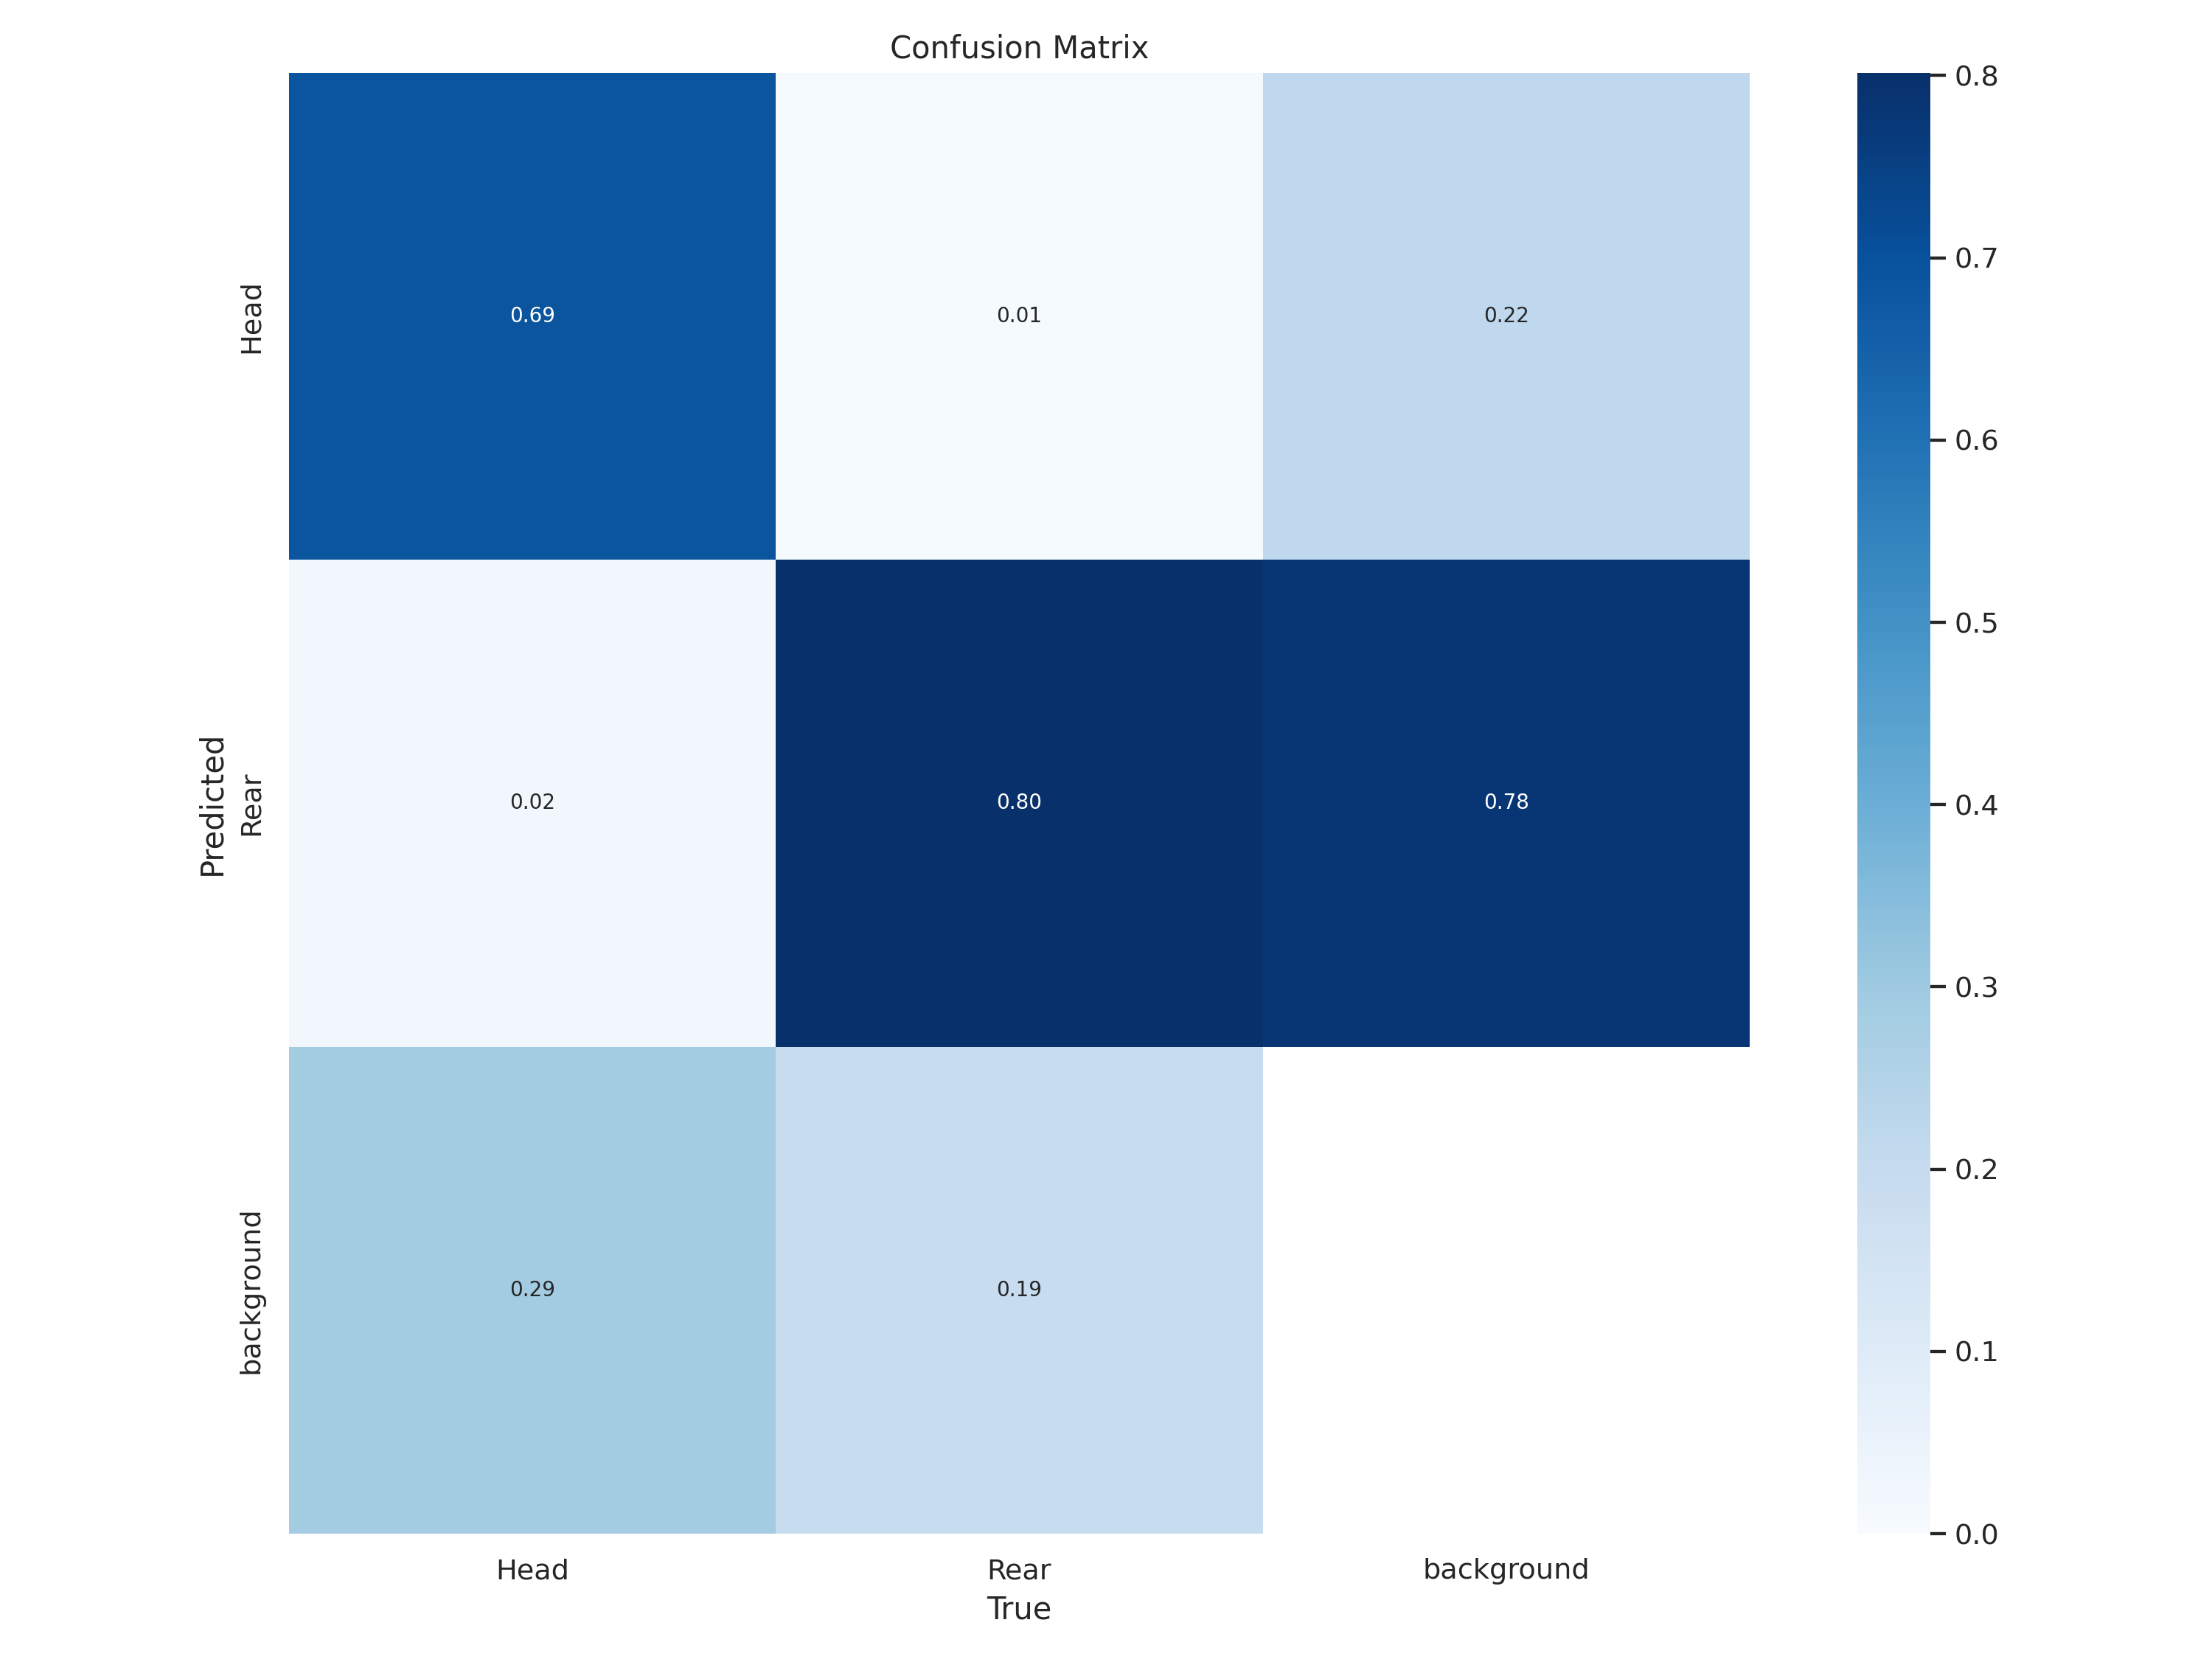

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=800)

/content


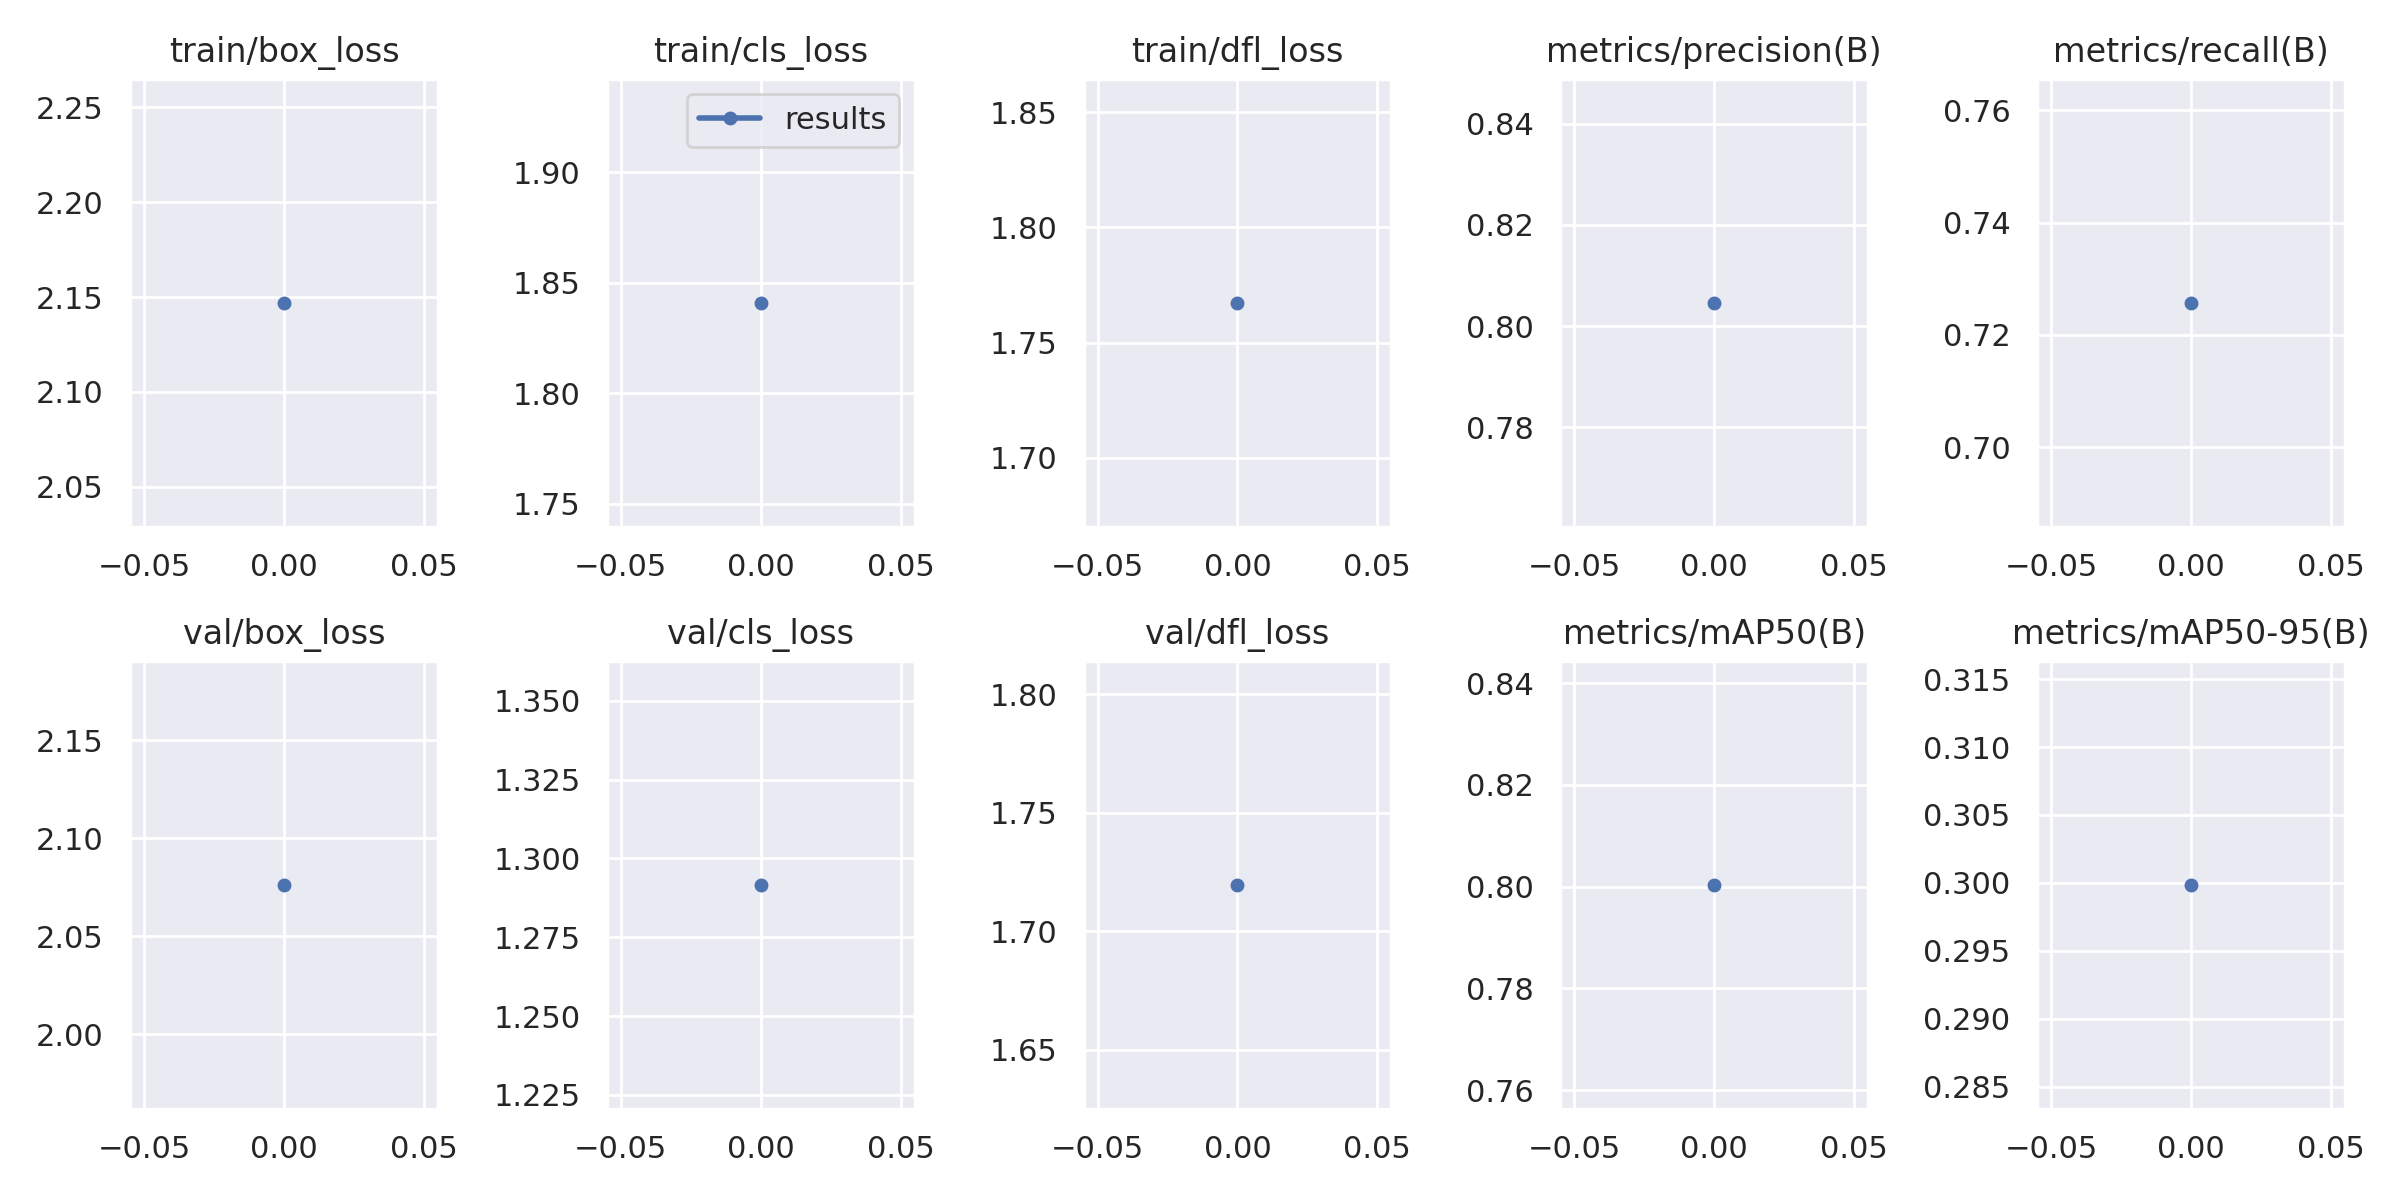

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=800)

/content


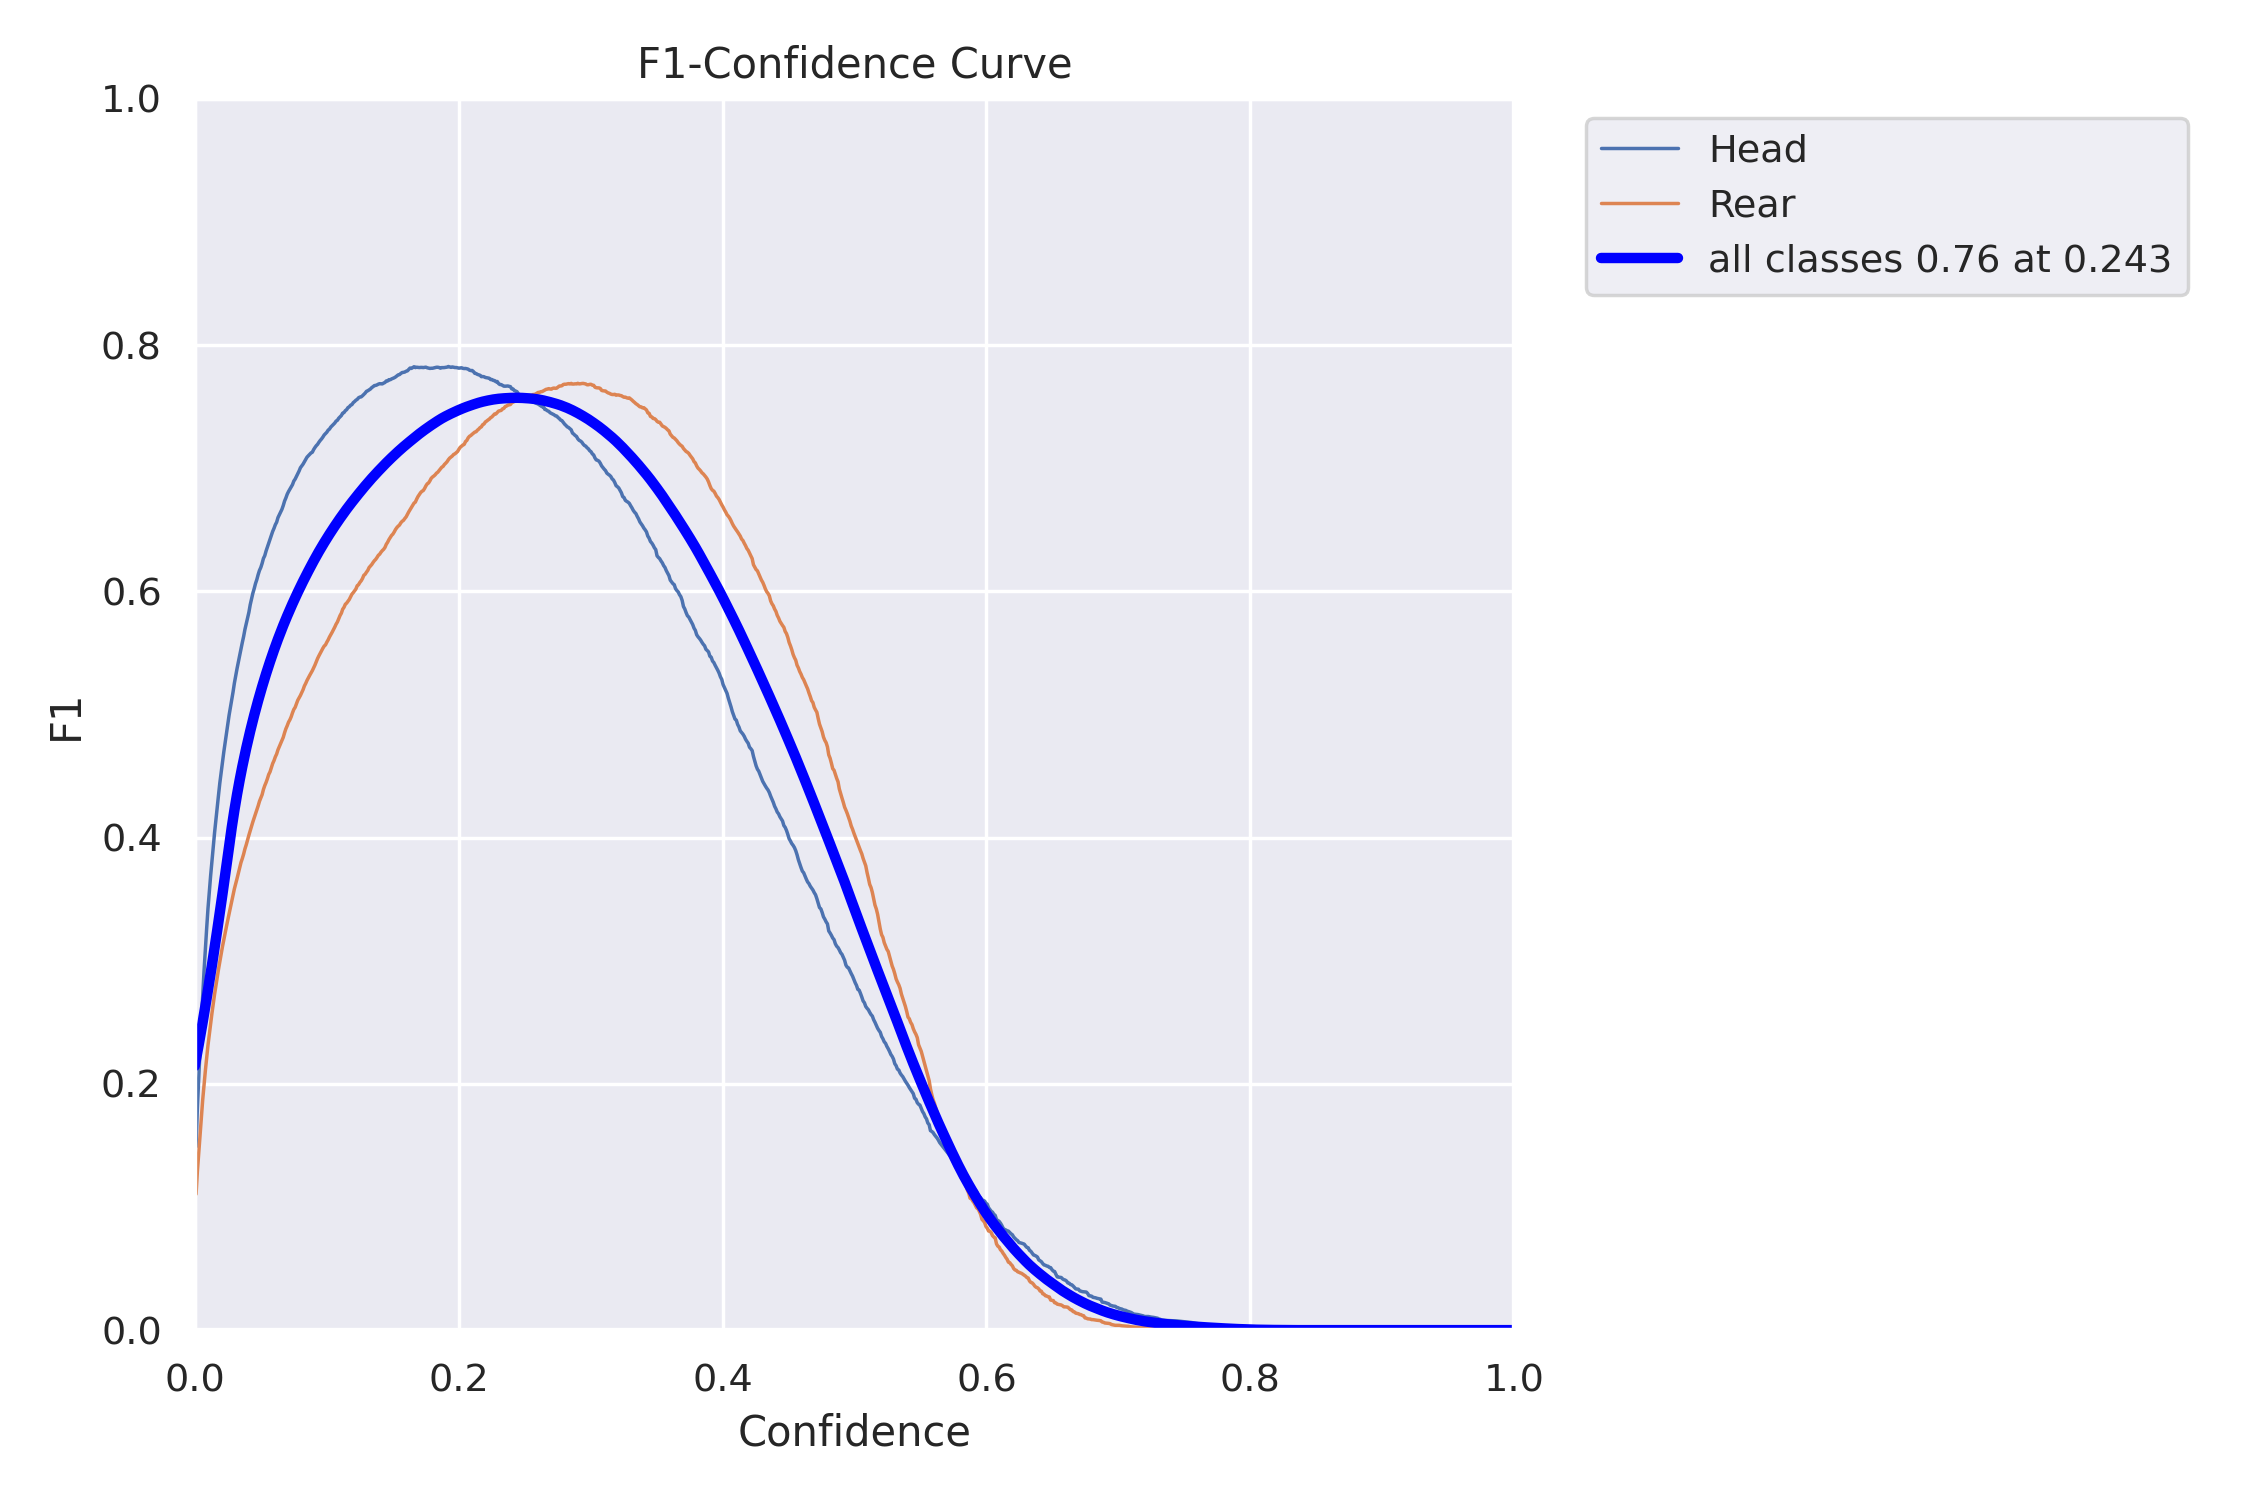

In [12]:
%cd {HOME}
Image(filename=f'{HOME}//runs/detect/train/F1_curve.png', width=800)

/content


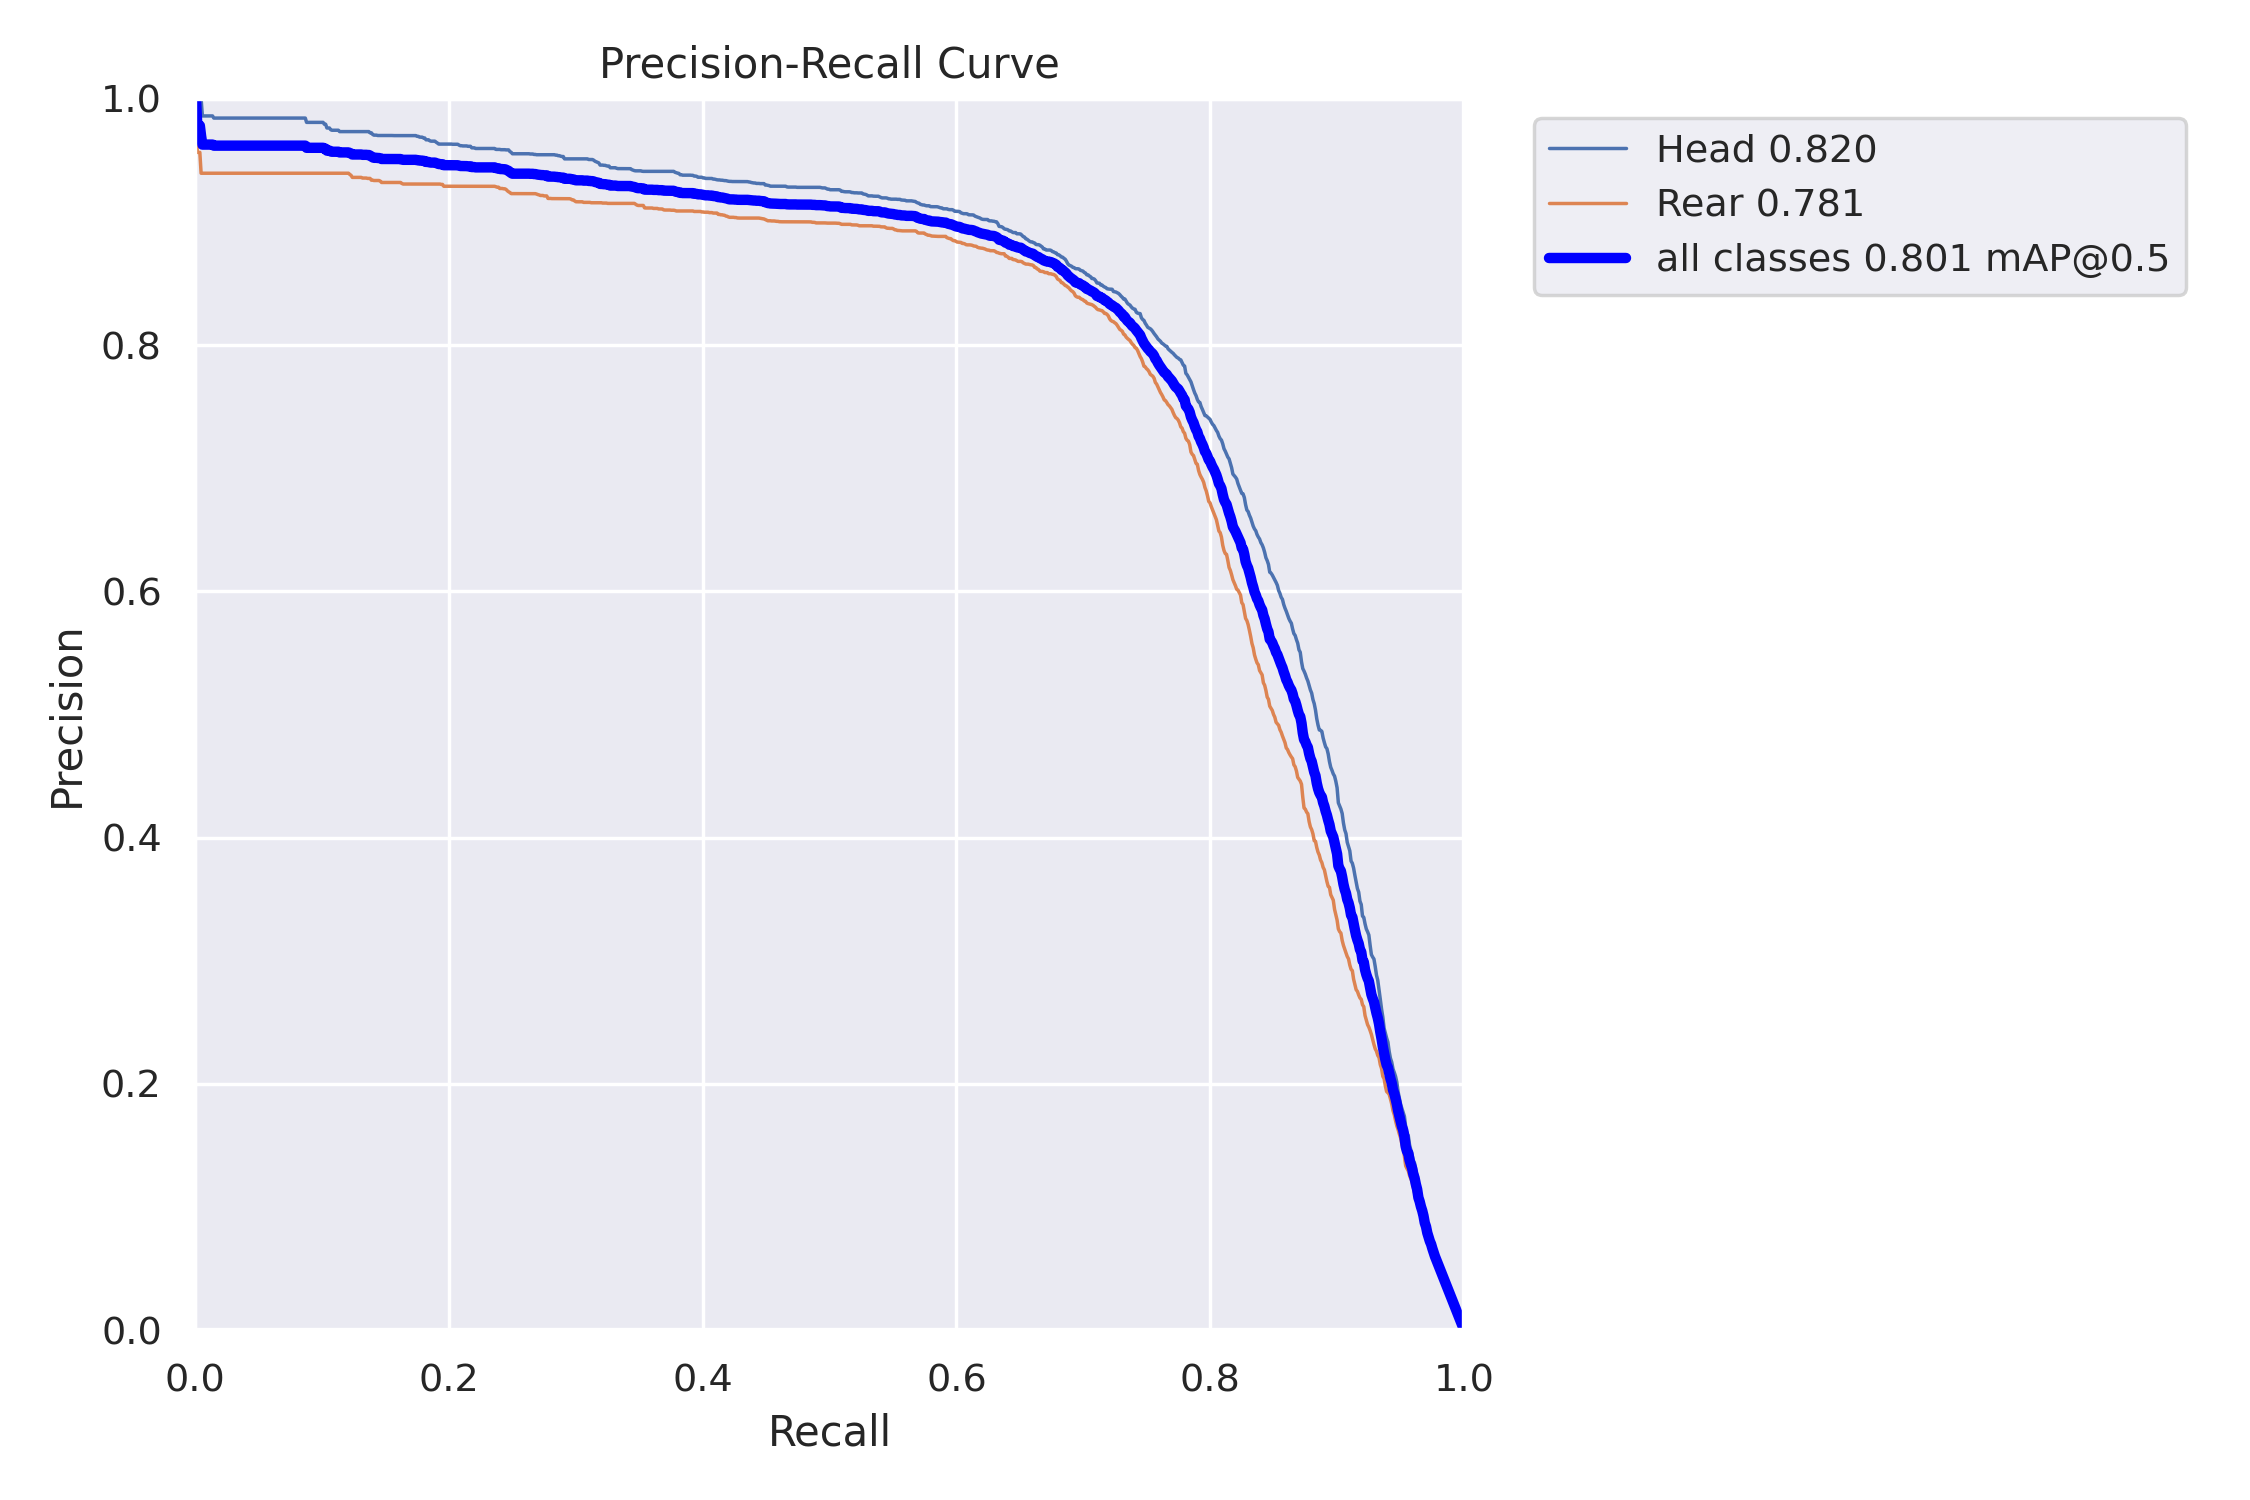

In [13]:
%cd {HOME}
Image(filename=f'{HOME}//runs/detect/train/PR_curve.png', width=800)

/content


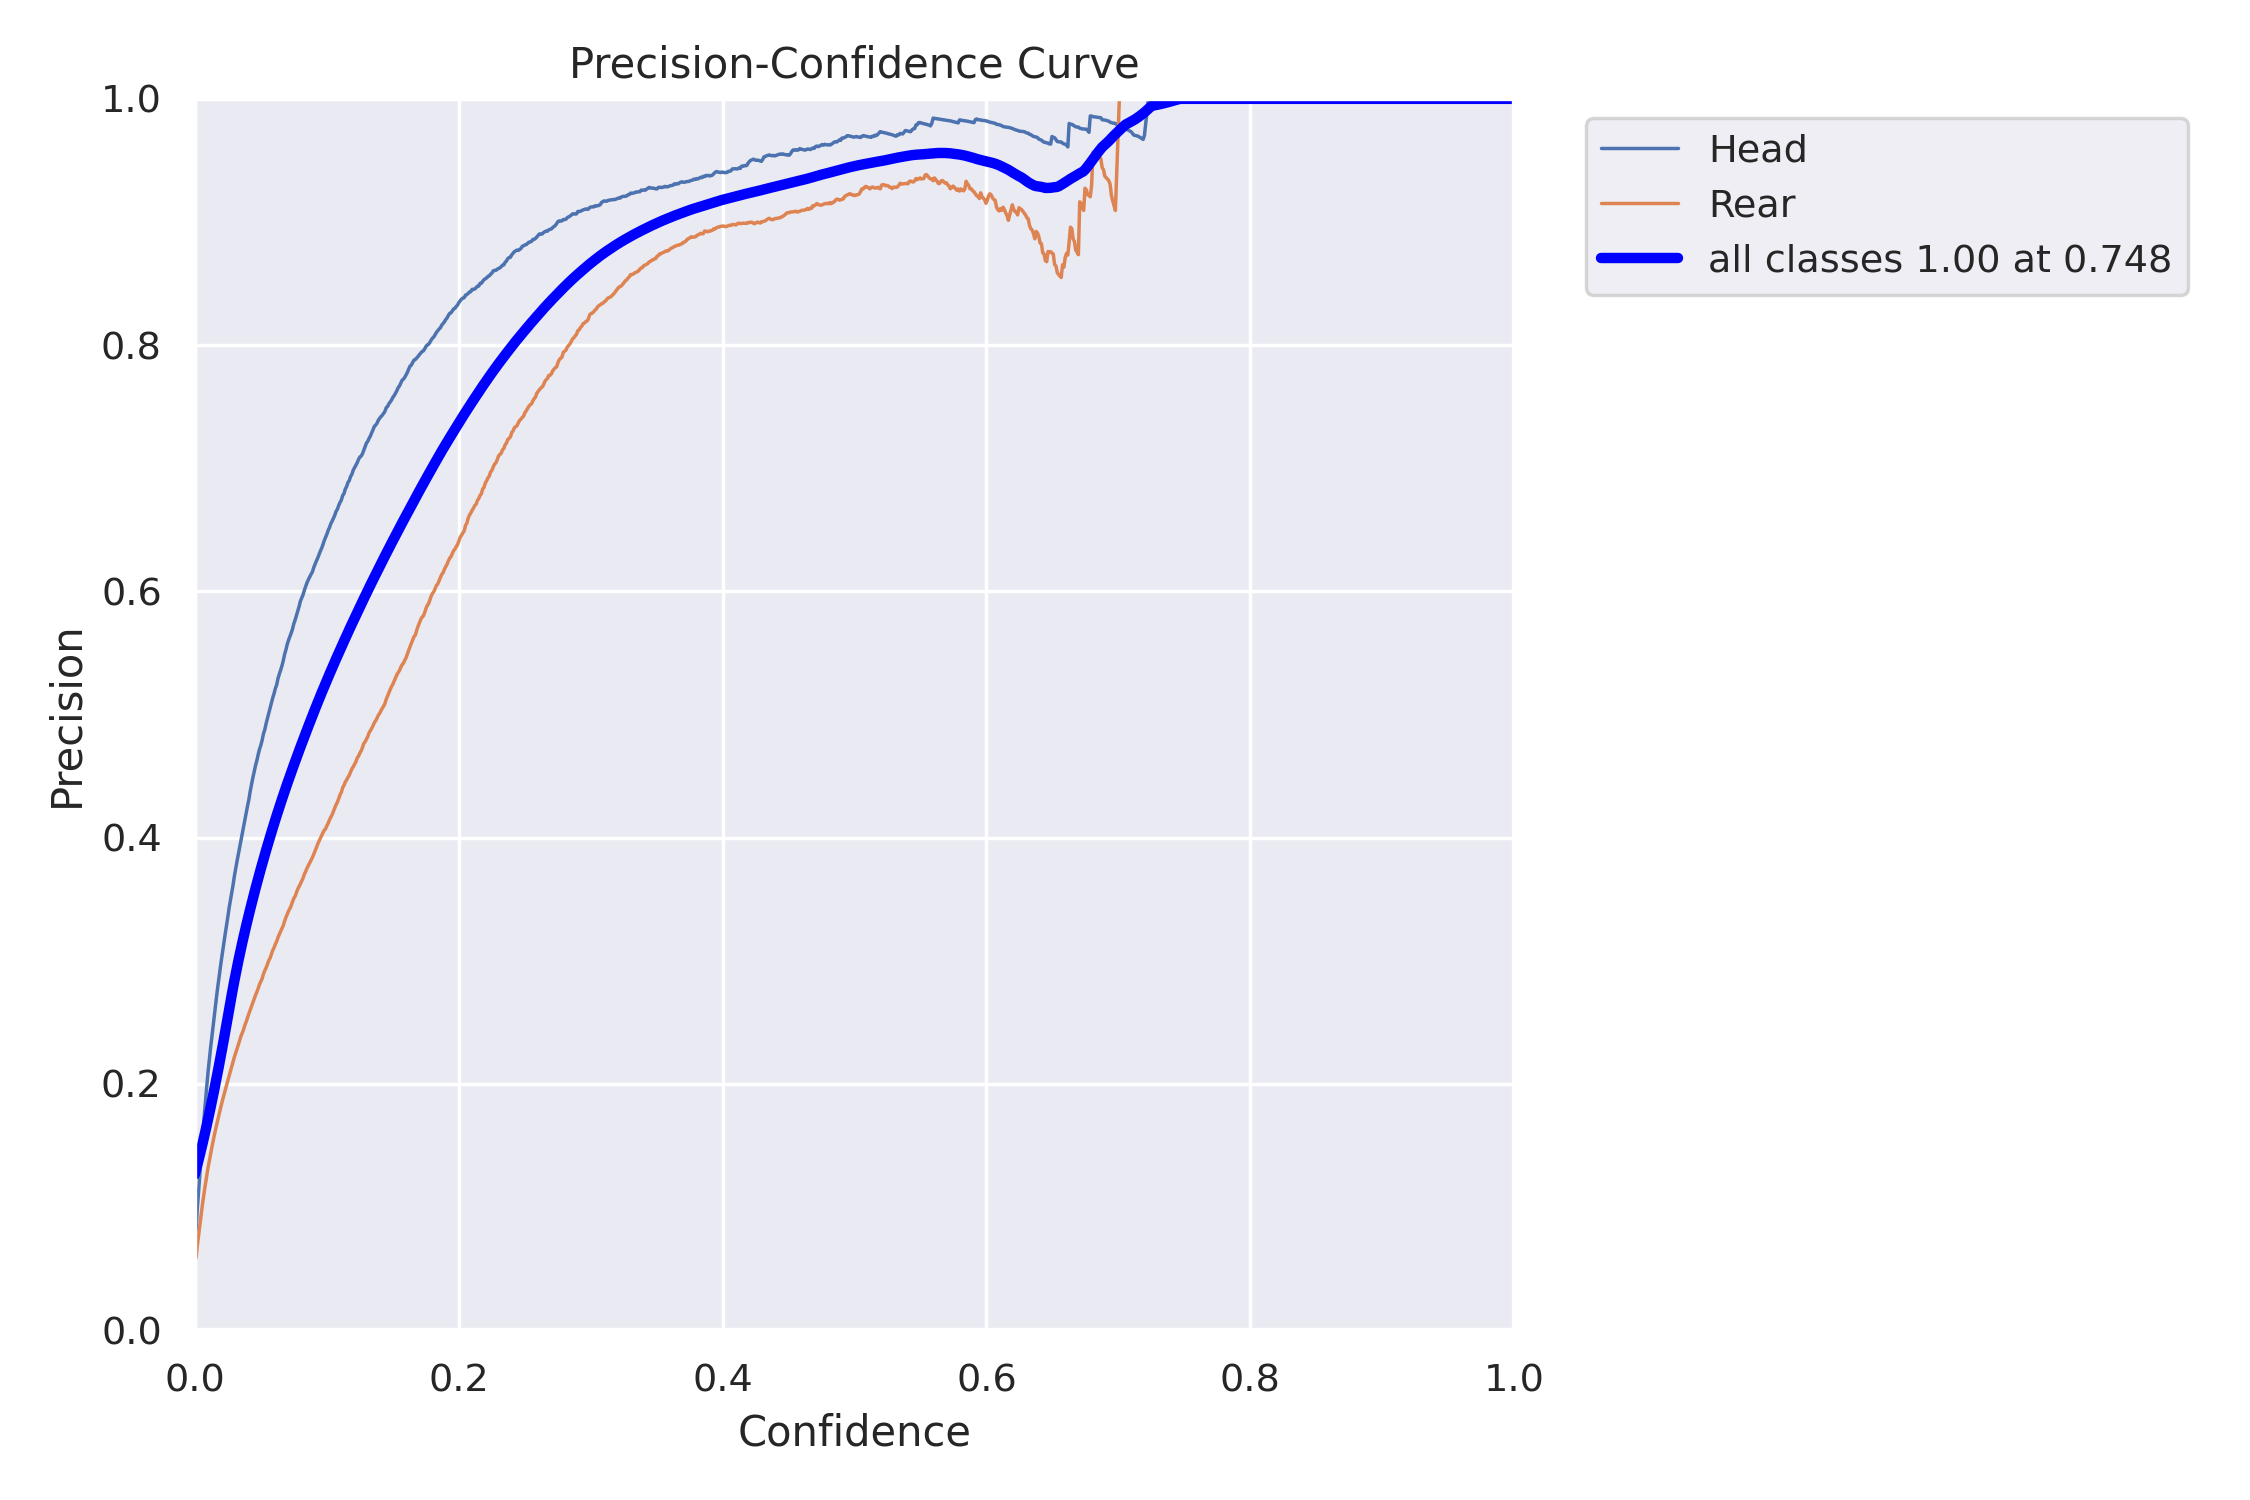

In [14]:
%cd {HOME}
Image(filename=f'{HOME}//runs/detect/train/P_curve.png', width=800)

/content


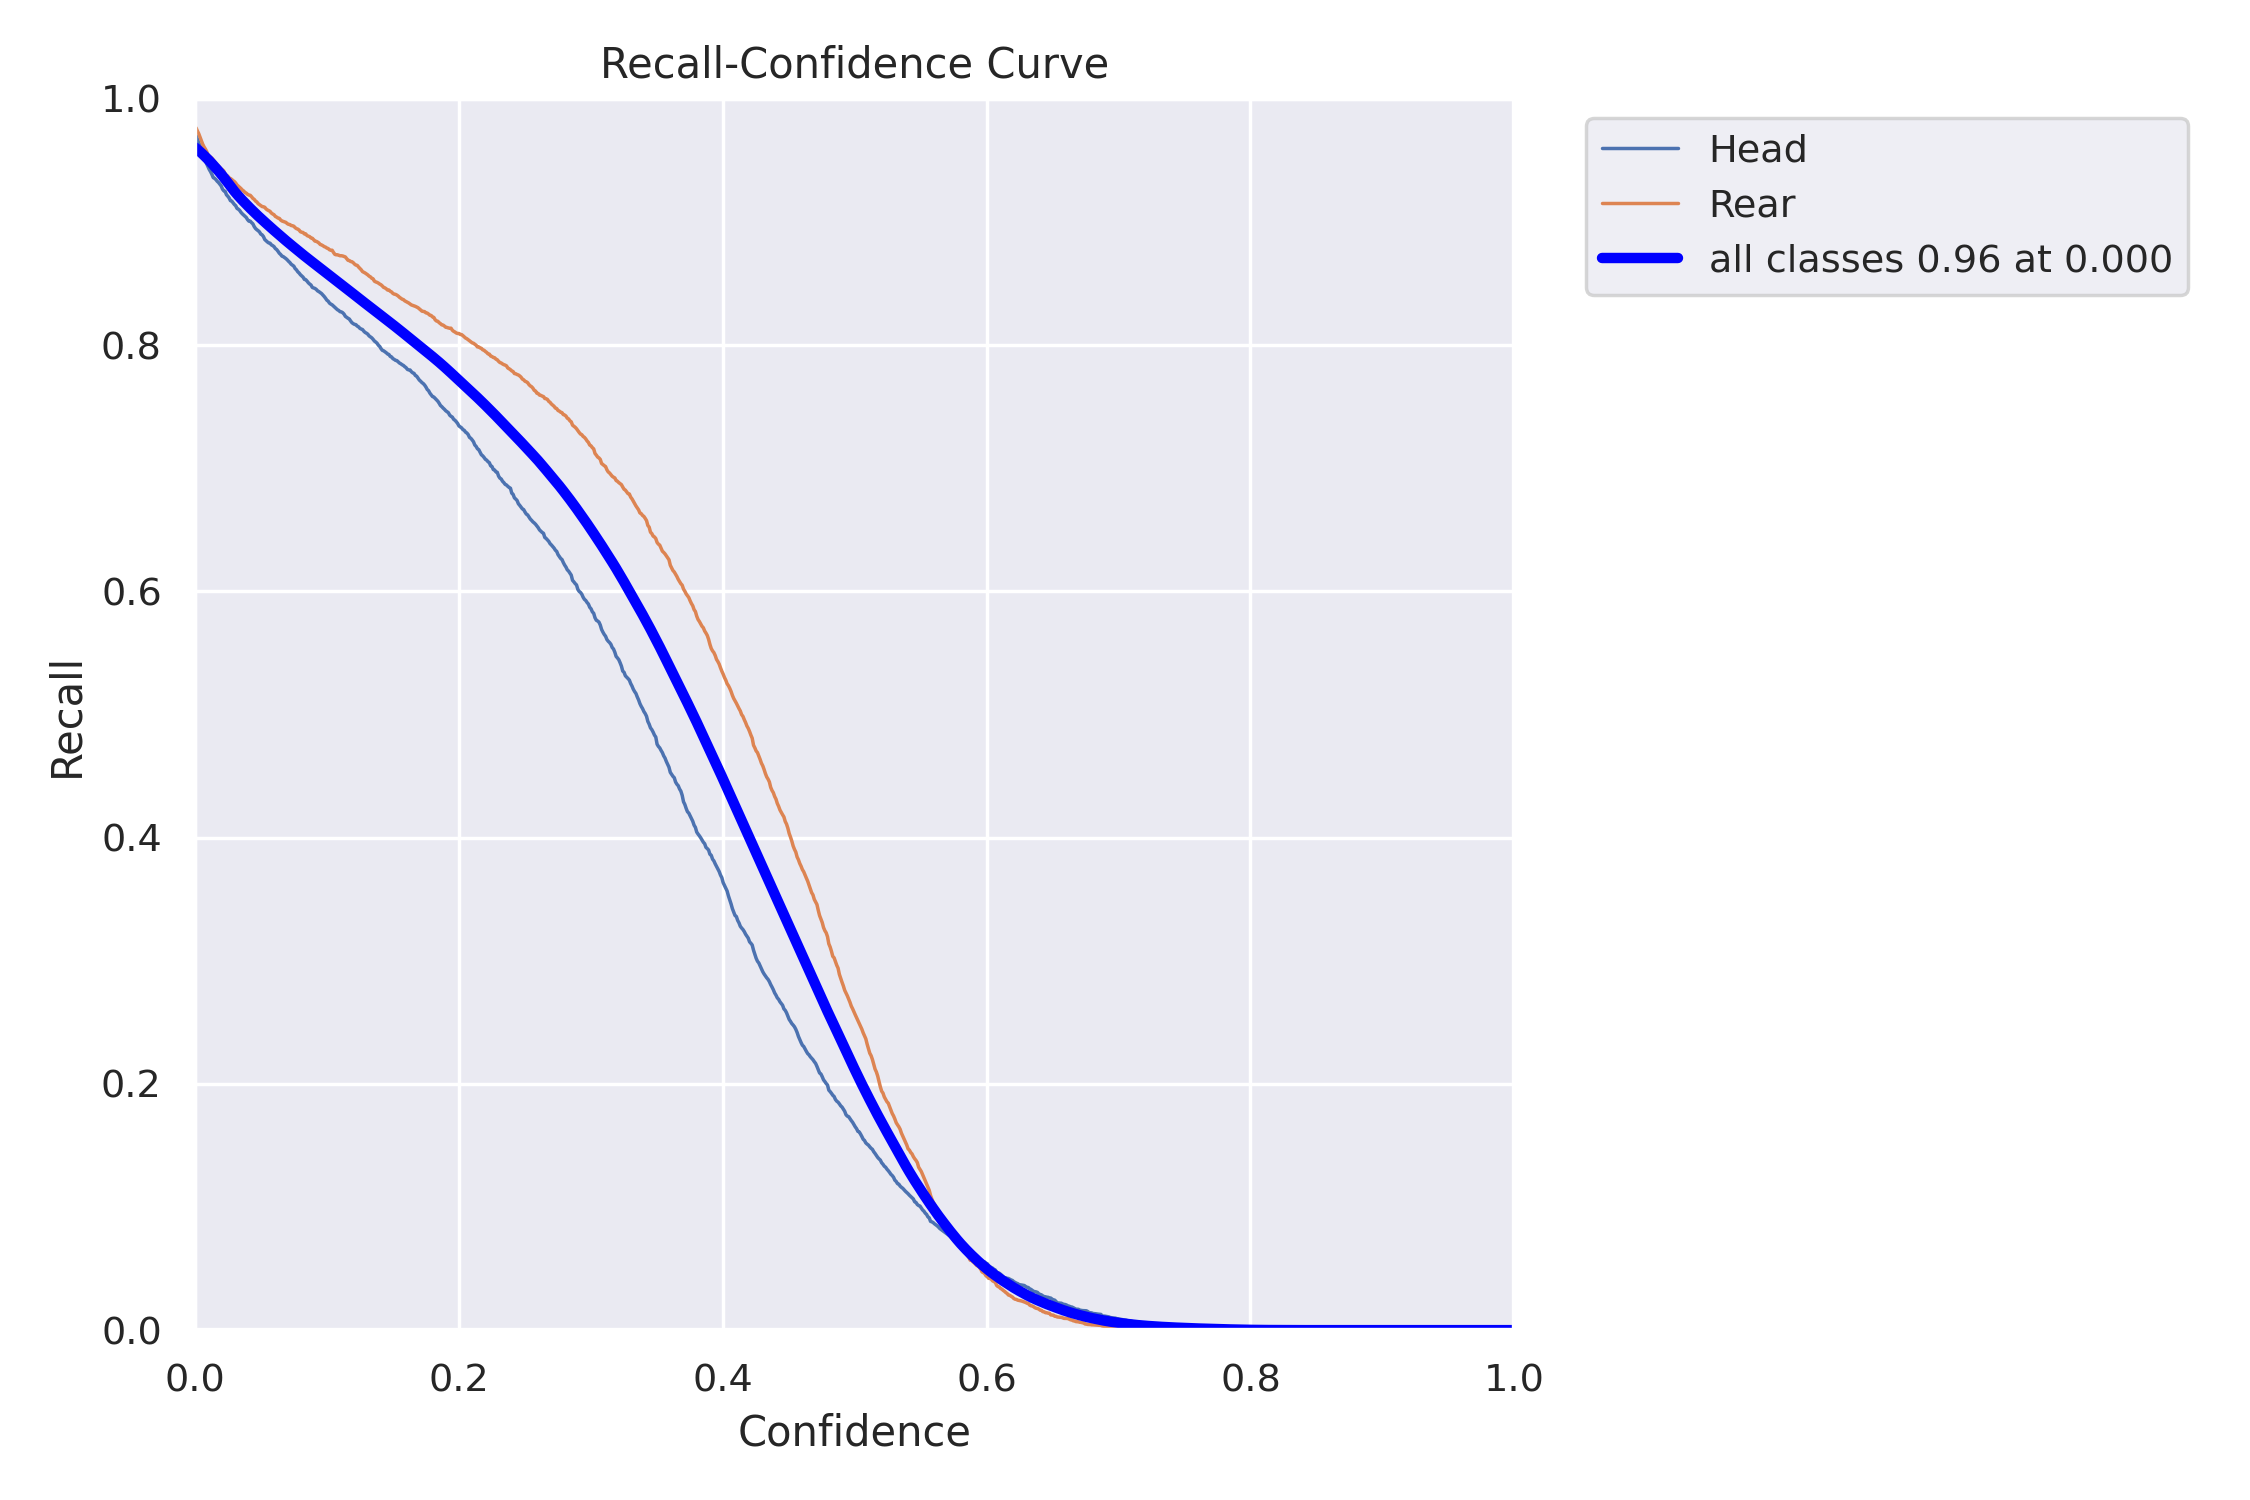

In [15]:
%cd {HOME}
Image(filename=f'{HOME}//runs/detect/train/R_curve.png', width=800)

## 6. Model Validation

In [16]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # lo

## 7. Inference on Test Data

In [17]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # lo

Now, let's display a few example predictions!

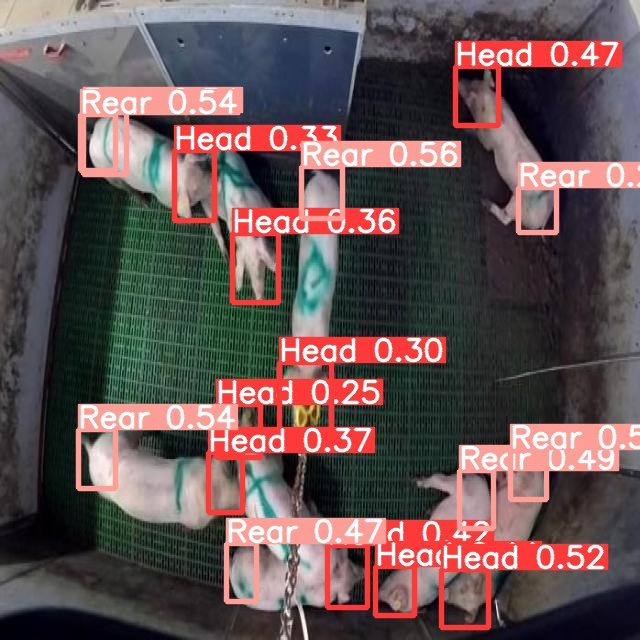

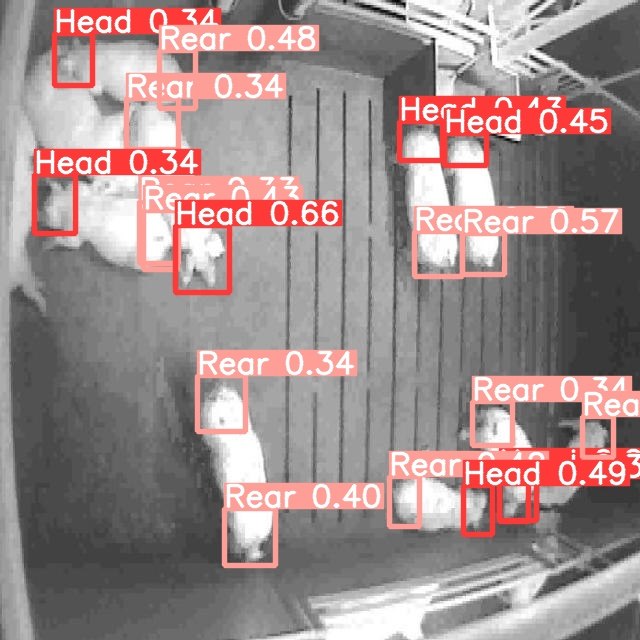

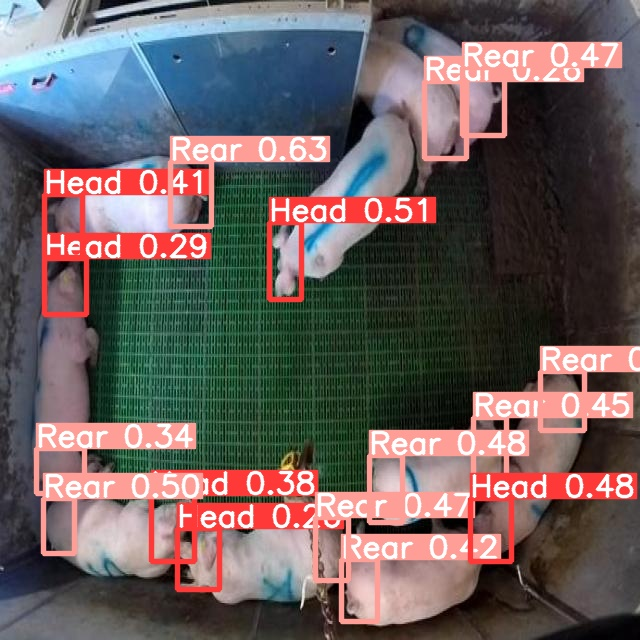

In [18]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
  display(Image(filename=image_path, width=600))
  print("\n")